In [10]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,  mean_absolute_error
import warnings
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

warnings.filterwarnings('ignore')

In [11]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('SELECT * FROM houseprices', con = engine)

engine.dispose()

In [12]:
house_df = pd.concat([house_df,pd.get_dummies(house_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_df = pd.concat([house_df,pd.get_dummies(house_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_df.street, prefix="street", drop_first=True).columns)

In [13]:
house_df['totalsf'] = house_df['totalbsmtsf'] + house_df['firstflrsf'] + house_df['secondflrsf']

house_df['int_over_sf'] = house_df['totalsf'] * house_df['overallqual']

# Y is the target variable
y = np.log1p(house_df['saleprice'])
# X is the feature set
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     651.8
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:37:05   Log-Likelihood:                 570.75
No. Observations:                1460   AIC:                            -1117.
Df Residuals:                    1448   BIC:                            -1054.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.8514      0.089    110.698      0.000       9.677      10.026
overallqual     0.1726      0.008     20.699      0.000       0.156       0.189
grlivarea    8.311e-05   1.72e-05      4.839      0.000    4.94e-05       0.000
garagecars      0.0818      0.013      6.307      0.000       0.056       0.107
garagearea   9.684e-05   4.51e-05      2.149      0.032    8.45e-06       0.000
totalsf         0.0003   2.33e-05     11.473      0.000       0.000       0.000
int_over_sf -2.064e-05   2.72e-06     -7.583      0.000    -2.6e-05   -1.53e-05
mszoning_FV     0.4920      0.059      8.344      0.000       0.376       0.608
mszoning_RH     0.3814      0.068      5.597      0.000       0.248       0.515
mszoning_RL     0.4844      0.055      8.845      0.000       0.377       0.592
mszoning_RM     0.3255      0.055      5.876      0.000       0.217       0.434
street_Pave    -0.0010      0.070     -0.014      0.989      -0.138       0.136
==============================================================================
Omnibus:                      489.548   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.468
Skew:                          -1.254   Prob(JB):                         0.00
Kurtosis:                      11.793   Cond. No.                     5.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

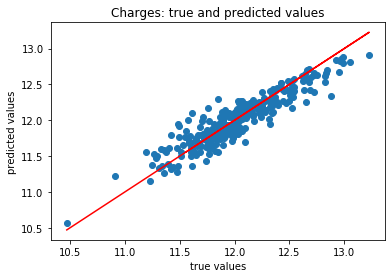

Mean absolute error of the prediction is: 0.11888179571930729
Mean squared error of the prediction is: 0.024481787529222684
Root mean squared error of the prediction is: 0.15646657000529757
Mean absolute percentage error of the prediction is: 0.9909539030330929


In [14]:
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [15]:
# Y is the target variable
y = house_df['saleprice']
# X is the feature set
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     358.1
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:37:07   Log-Likelihood:                -14011.
No. Observations:                1168   AIC:                         2.804e+04
Df Residuals:                    1157   BIC:                         2.810e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.285e+05   2.13e+04     -6.035      0.000    -1.7e+05   -8.67e+04
overallqual  2.377e+04   1233.950     19.266      0.000    2.14e+04    2.62e+04
grlivarea      44.1366      2.803     15.748      0.000      38.638      49.636
garagecars   1.395e+04   3378.461      4.128      0.000    7317.879    2.06e+04
garagearea     17.8234     11.821      1.508      0.132      -5.369      41.016
totalbsmtsf    23.3714      3.389      6.897      0.000      16.723      30.020
mszoning_FV  2.751e+04   1.52e+04      1.807      0.071   -2355.039    5.74e+04
mszoning_RH  1.464e+04   1.75e+04      0.835      0.404   -1.97e+04     4.9e+04
mszoning_RL  3.183e+04   1.41e+04      2.256      0.024    4148.328    5.95e+04
mszoning_RM  1.228e+04   1.43e+04      0.857      0.392   -1.58e+04    4.04e+04
street_Pave  1.069e+04    2.1e+04      0.508      0.611   -3.06e+04     5.2e+04
==============================================================================
Omnibus:                      337.651   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31624.642
Skew:                           0.177   Prob(JB):                         0.00
Kurtosis:                      28.489   Cond. No.                     5.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

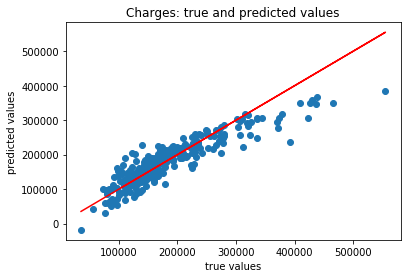

Mean absolute error of the prediction is: 24525.013815241407
Mean squared error of the prediction is: 1169221810.4994378
Root mean squared error of the prediction is: 34193.8855718305
Mean absolute percentage error of the prediction is: 14.770944283808198


In [16]:
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# first model was better imo, gotta do test set now

In [17]:
house_df['totalsf'] = house_df['totalbsmtsf'] + house_df['firstflrsf'] + house_df['secondflrsf']

house_df['int_over_sf'] = house_df['totalsf'] * house_df['overallqual']

# Y is the target variable
y = np.log1p(house_df['saleprice'])
# X is the feature set
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
results = sm.OLS(y_train, X_train).fit()

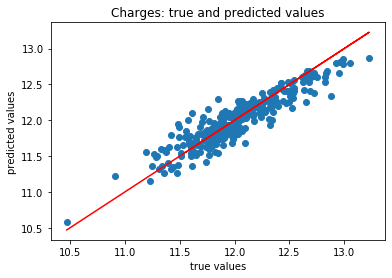

Mean absolute error of the prediction is: 0.12206728664805498
Mean squared error of the prediction is: 0.025558158253018073
Root mean squared error of the prediction is: 0.15986919106888003
Mean absolute percentage error of the prediction is: 1.016792543066646


In [18]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# The log model clearly is better

In [19]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8279665018540019
-----Test set statistics-----
R-squared of the model in test set is: 0.8438808603296216
Mean absolute error of the prediction is: 0.12206728664751157
Mean squared error of the prediction is: 0.025558158252833647
Root mean squared error of the prediction is: 0.15986919106830325
Mean absolute percentage error of the prediction is: 1.0167925430625038


In [20]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.8278252981298758
-----Test set statistics-----
R-squared of the model in test set is: 0.8434565338786713
Mean absolute error of the prediction is: 0.12239305255683434
Mean squared error of the prediction is: 0.025627624447735524
Root mean squared error of the prediction is: 0.1600863031234575
Mean absolute percentage error of the prediction is: 1.0197371069084642


In [21]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.1
R-squared of the model in training set is: 0.8279522105152239
-----Test set statistics-----
R-squared of the model in test set is: 0.843601620169968
Mean absolute error of the prediction is: 0.12223431669597237
Mean squared error of the prediction is: 0.025603872469591712
Root mean squared error of the prediction is: 0.1600121010098665
Mean absolute percentage error of the prediction is: 1.0182631764744028


In [22]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.8279030596655597
-----Test set statistics-----
R-squared of the model in test set is: 0.8435209757671108
Mean absolute error of the prediction is: 0.12232238805349085
Mean squared error of the prediction is: 0.025617074709975485
Root mean squared error of the prediction is: 0.16005334957437
Mean absolute percentage error of the prediction is: 1.019076852425378


# OLS is the best model